In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_csv('AAPL_cleaned.csv')

# Drop the 'Datetime' column
df = df.drop(columns=['Datetime'])





# Calculate the rolling average close price over the last 5 hours which is 120 rows in the dataset
df['rolling_avg'] = df['close'].rolling(window=120).mean()

# Set the target based on whether the current close price is greater than the rolling average
df['target'] = df.apply(lambda row: 1 if row['close'] >= row['rolling_avg'] else 0, axis=1)

# Drop the 'rolling_avg' column as it's no longer needed
df.drop(columns=['rolling_avg'], inplace=True)



# Drop rows where target value can't be defined
df = df.iloc[120:]

# Define categorical columns
categorical_columns = [
    'trend', 'volume_bin', 'rsi_10_bin', 'macd_6_13_5_bin',
    'stochd_14_3_3_bin', 'mfi_19_bin', 'volume_adi_bin', 
    'volume_obv_bin', 'volume_cmf_bin', 'volume_fi_bin', 
    'volume_em_bin', 'volume_sma_em_bin', 'volume_vpt_bin',
    'volume_nvi_bin', 'volatility_bbhi_bin', 'volatility_bbli_bin',
    'volatility_kcw_bin', 'volatility_kcp_bin', 'volatility_kchi_bin',
    'volatility_kcli_bin', 'volatility_dcw_bin', 'volatility_dcp_bin',
    'volatility_atr_bin', 'volatility_ui_bin', 'trend_vortex_ind_pos_bin',
    'trend_mass_index_bin', 'trend_adx_bin', 'momentum_stoch_rsi_bin',
    'momentum_roc_bin'
]

# Define the features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']


In [2]:
# Perform one-hot encoding
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=True)
X_encoded = X_encoded.dropna(axis=1)

# Split data into training (70%), validation (10%), and test sets (20%)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=42)

# Print the percentages of the datasets
def print_dataset_stats(X_train, X_val, X_test):
    total_samples = len(X_encoded)
    train_percent = len(X_train) / total_samples * 100
    val_percent = len(X_val) / total_samples * 100
    test_percent = len(X_test) / total_samples * 100
    print(f'Training set size: {len(X_train)}, {train_percent:.2f}% of total')
    print(f'Validation set size: {len(X_val)}, {val_percent:.2f}% of total')
    print(f'Test set size: {len(X_test)}, {test_percent:.2f}% of total')

print_dataset_stats(X_train, X_val, X_test)

# Model Training and Evaluation Function
def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    
    print(classification_report(y_test, y_pred))
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'ROC-AUC: {roc_auc}')

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)  # Change cmap here to set the color
    plt.title('Confusion Matrix')
    plt.show()



Training set size: 762, 69.97% of total
Validation set size: 109, 10.01% of total
Test set size: 218, 20.02% of total


Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       102
           1       0.99      0.98      0.99       116

    accuracy                           0.99       218
   macro avg       0.99      0.99      0.99       218
weighted avg       0.99      0.99      0.99       218

Accuracy: 0.9862385321100917
Precision: 0.991304347826087
Recall: 0.9827586206896551
F1 Score: 0.9870129870129869
ROC-AUC: 0.9996619337390129


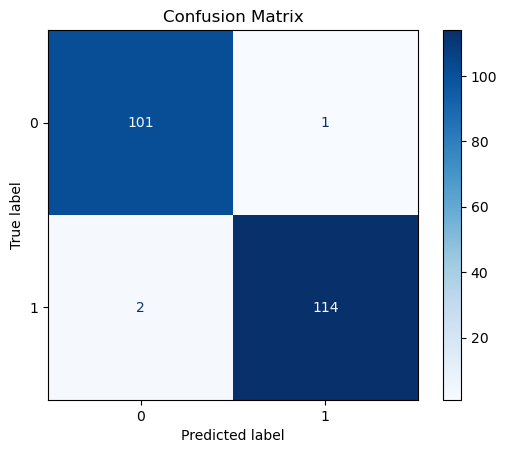

Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       102
           1       0.95      0.97      0.96       116

    accuracy                           0.96       218
   macro avg       0.96      0.96      0.96       218
weighted avg       0.96      0.96      0.96       218

Accuracy: 0.9587155963302753
Precision: 0.9495798319327731
Recall: 0.9741379310344828
F1 Score: 0.9617021276595743
ROC-AUC: 0.957657200811359


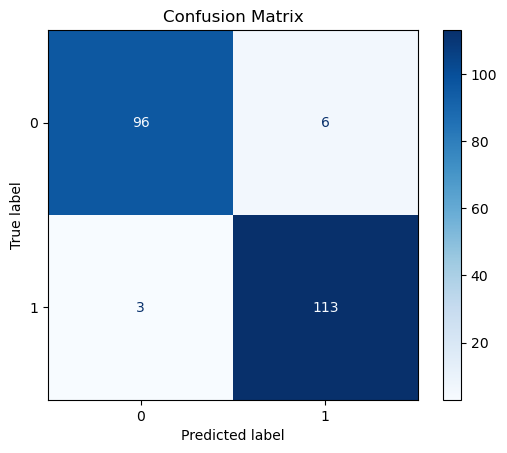

Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80       102
           1       0.85      0.78      0.81       116

    accuracy                           0.81       218
   macro avg       0.81      0.81      0.81       218
weighted avg       0.81      0.81      0.81       218

Accuracy: 0.8073394495412844
Precision: 0.8490566037735849
Recall: 0.7758620689655172
F1 Score: 0.8108108108108107
ROC-AUC: 0.8831135902636916


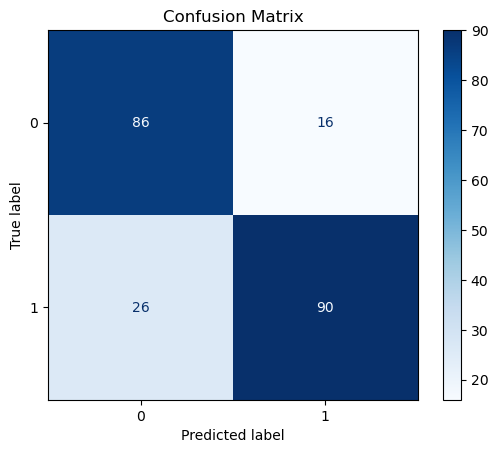

Support Vector Machine (SVM) Classifier:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       102
           1       0.82      0.84      0.83       116

    accuracy                           0.82       218
   macro avg       0.82      0.82      0.82       218
weighted avg       0.82      0.82      0.82       218

Accuracy: 0.8211009174311926
Precision: 0.8235294117647058
Recall: 0.8448275862068966
F1 Score: 0.8340425531914895
ROC-AUC: 0.8952839756592291


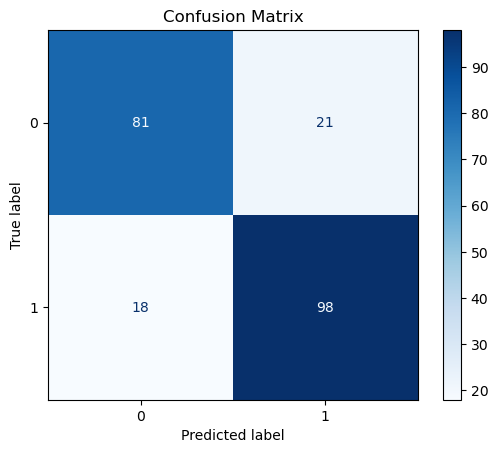

Gradient Boosting Classifier:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       102
           1       0.98      0.97      0.98       116

    accuracy                           0.98       218
   macro avg       0.98      0.98      0.98       218
weighted avg       0.98      0.98      0.98       218

Accuracy: 0.9770642201834863
Precision: 0.9826086956521739
Recall: 0.9741379310344828
F1 Score: 0.9783549783549784
ROC-AUC: 0.998816768086545


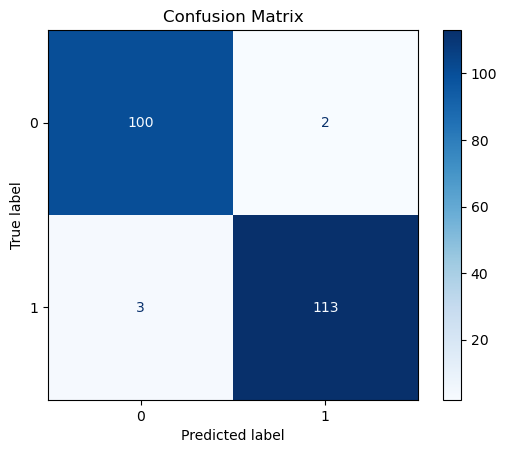

Best Random Forest Classifier after Grid Search:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       102
           1       0.98      0.98      0.98       116

    accuracy                           0.98       218
   macro avg       0.98      0.98      0.98       218
weighted avg       0.98      0.98      0.98       218

Accuracy: 0.981651376146789
Precision: 0.9827586206896551
Recall: 0.9827586206896551
F1 Score: 0.9827586206896551
ROC-AUC: 0.999577417173766


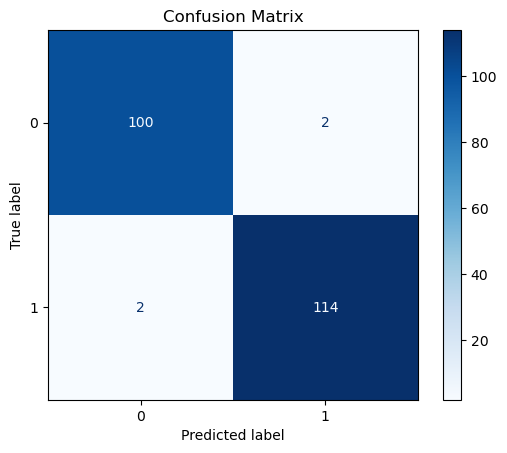

In [3]:
# Random Forest Classifier
print("Random Forest Classifier:")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_evaluate_model(rf_model, X_train, y_train, X_test, y_test)

# Decision Tree Classifier
print("Decision Tree Classifier:")
dt_model = DecisionTreeClassifier(random_state=42)
train_evaluate_model(dt_model, X_train, y_train, X_test, y_test)

# Logistic Regression
print("Logistic Regression:")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
train_evaluate_model(lr_model, X_train, y_train, X_test, y_test)

# Support Vector Machine (SVM) Classifier
print("Support Vector Machine (SVM) Classifier:")
svm_model = SVC(kernel='rbf', random_state=42, probability=True)
train_evaluate_model(svm_model, X_train, y_train, X_test, y_test)

# Gradient Boosting Classifier
print("Gradient Boosting Classifier:")
gb_model = GradientBoostingClassifier(random_state=42)
train_evaluate_model(gb_model, X_train, y_train, X_test, y_test)


# Grid Search for Hyperparameter Tuning (Optional)
param_grid_rf = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 5, 6]
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=0, scoring='accuracy')
grid = grid_search_rf.fit(X_train, y_train)
best_rf_model = grid.best_estimator_

print("Best Random Forest Classifier after Grid Search:")
train_evaluate_model(best_rf_model, X_train, y_train, X_test, y_test)


Validation Set Evaluation for Best Models:
Random Forest Classifier (Validation):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        59

    accuracy                           1.00       109
   macro avg       1.00      1.00      1.00       109
weighted avg       1.00      1.00      1.00       109

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC-AUC: 1.0


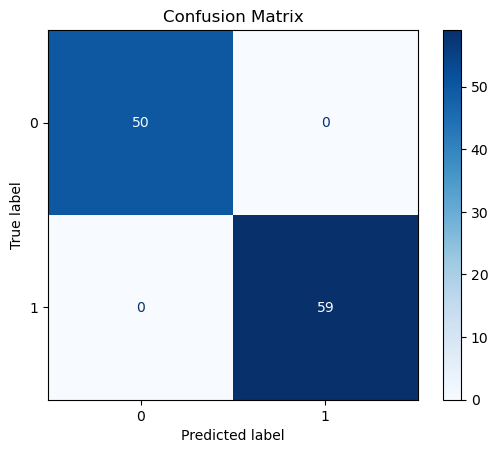

Decision Tree Classifier (Validation):
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.97      0.98      0.97        59

    accuracy                           0.97       109
   macro avg       0.97      0.97      0.97       109
weighted avg       0.97      0.97      0.97       109

Accuracy: 0.9724770642201835
Precision: 0.9666666666666667
Recall: 0.9830508474576272
F1 Score: 0.9747899159663865
ROC-AUC: 0.9715254237288136


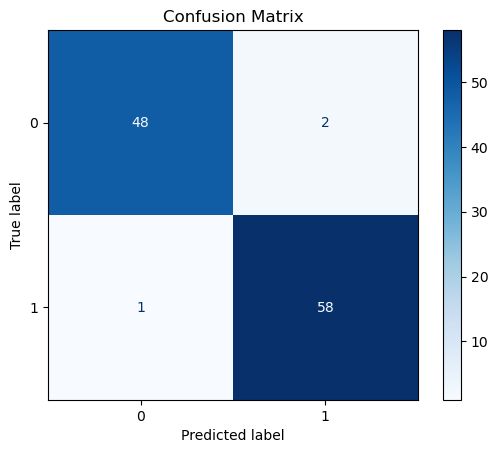

Logistic Regression (Validation):
              precision    recall  f1-score   support

           0       0.70      0.84      0.76        50
           1       0.84      0.69      0.76        59

    accuracy                           0.76       109
   macro avg       0.77      0.77      0.76       109
weighted avg       0.77      0.76      0.76       109

Accuracy: 0.7614678899082569
Precision: 0.8367346938775511
Recall: 0.6949152542372882
F1 Score: 0.7592592592592592
ROC-AUC: 0.8328813559322035


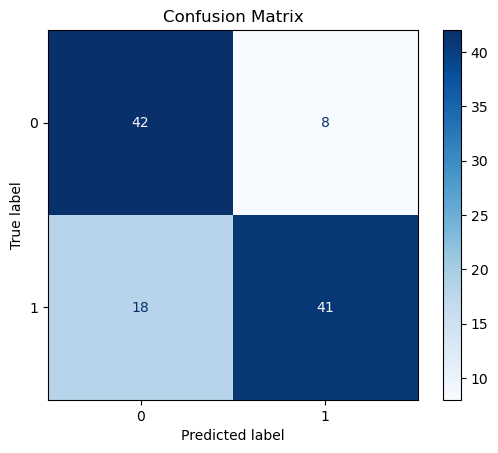

Support Vector Machine (SVM) Classifier (Validation):
              precision    recall  f1-score   support

           0       0.78      0.84      0.81        50
           1       0.85      0.80      0.82        59

    accuracy                           0.82       109
   macro avg       0.82      0.82      0.82       109
weighted avg       0.82      0.82      0.82       109

Accuracy: 0.8165137614678899
Precision: 0.8545454545454545
Recall: 0.7966101694915254
F1 Score: 0.8245614035087718
ROC-AUC: 0.9288135593220338


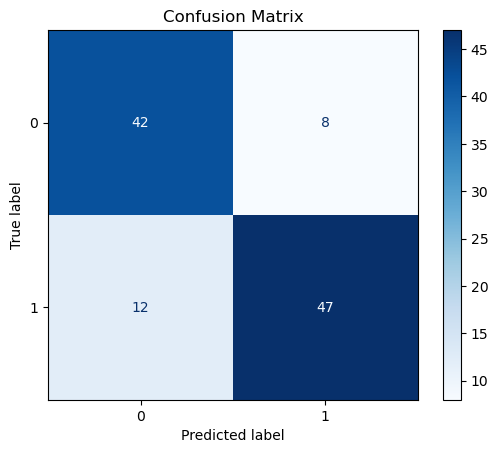

Gradient Boosting Classifier (Validation):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        50
           1       1.00      0.97      0.98        59

    accuracy                           0.98       109
   macro avg       0.98      0.98      0.98       109
weighted avg       0.98      0.98      0.98       109

Accuracy: 0.981651376146789
Precision: 1.0
Recall: 0.9661016949152542
F1 Score: 0.9827586206896551
ROC-AUC: 1.0


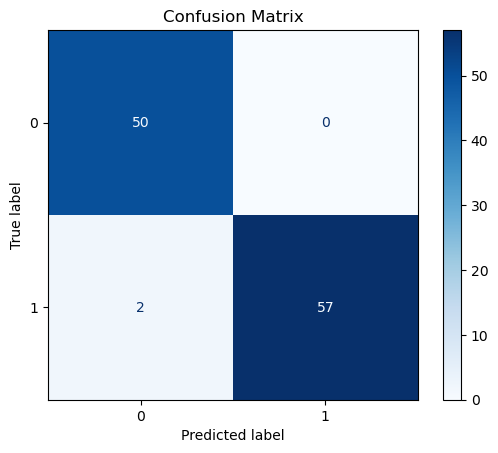

In [4]:
# Comparing Model Performance on Validation Set
print("Validation Set Evaluation for Best Models:")

print("Random Forest Classifier (Validation):")
train_evaluate_model(best_rf_model, X_train, y_train, X_val, y_val)

print("Decision Tree Classifier (Validation):")
train_evaluate_model(dt_model, X_train, y_train, X_val, y_val)

print("Logistic Regression (Validation):")
train_evaluate_model(lr_model, X_train, y_train, X_val, y_val)

print("Support Vector Machine (SVM) Classifier (Validation):")
train_evaluate_model(svm_model, X_train, y_train, X_val, y_val)

print("Gradient Boosting Classifier (Validation):")
train_evaluate_model(gb_model, X_train, y_train, X_val, y_val)
